### `Paper` Al Khourdajie, A., Skea, J., & Green, R. (2024). Climate ambition, background scenario or the model? Attribution of the variance of energy-related indicators in global scenarios. Energy and Climate Change, 100126. ISSN 2666-2787. Available at: https://doi.org/10.1016/j.egycc.2024.100126.
### `Version` January 2024 
### `Authors` Alaa Al Khourdajie, Jim Skea, Richard Green

### Script: `Data Preparation`
Downselecting the SSPs Scenario Database variables to those that are needed for the analysis, and added new variables and metadata

1. Import libraries and load the data

In [3]:
# Importing needed libraries
import pyam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read in the data

path = "../05_data/ssps_original_data/" # Change the path as needed. 
# SSP Database (Shared Socioeconomic Pathways) - Version 2.0 is available from: https://tntcat.iiasa.ac.at/SspDb/dsd?Action=htmlpage&page=10 
# It is also possible to read directly from IIASA data resources: https://pyam-iamc.readthedocs.io/en/stable/tutorials/iiasa.html

data_file = pd.read_csv(path + "SSP_IAM_V2_201811.csv")

In [5]:
# Convert to pyam IamDataFrame
df_ssps = pyam.IamDataFrame(data_file)

In [6]:
# Check the data
df_ssps

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE, GCAM4, IMAGE, MESSAGE-GLOBIOM, ... WITCH-GLOBIOM (6)
 * scenario : SSP1-19, SSP1-26, SSP1-34, SSP1-45, SSP1-60, ... SSP5-Baseline (28)
Timeseries data coordinates:
   region   : R5.2ASIA, R5.2LAM, R5.2MAF, R5.2OECD, R5.2REF, World (6)
   variable : Agricultural Demand|Crops, ... Secondary Energy|Solids (153)
   unit     : EJ/yr, GW, Mt BC/yr, Mt CH4/yr, Mt CO/yr, ... °C (24)
   year     : 2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, ... 2100 (11)

2. Downselect data to the variables of interest, and create needed metadata 

In [7]:
# Downselect the data to the "World" region
df_ssps_w = df_ssps.filter(region = 'World')
df_ssps_w.region

['World']

In [8]:
# Downselect the data to the variables of intetrest
df_ssps_downselected=df_ssps_w.filter(
    variable=[
        # Energy variables - Primaries
        'Primary Energy',
        "Primary Energy|Wind",
        "Primary Energy|Solar",
        "Primary Energy|Biomass",
        'Primary Energy|Biomass|w/ CCS',
        "Primary Energy|Hydro",
        "Primary Energy|Nuclear",
        'Primary Energy|Geothermal',
        'Primary Energy|Fossil',
        "Primary Energy|Fossil|w/ CCS",
        "Primary Energy|Fossil|w/o CCS",
        'Primary Energy|Coal',
        'Primary Energy|Coal|w/ CCS',
        'Primary Energy|Coal|w/o CCS',
        'Primary Energy|Oil',
        'Primary Energy|Oil|w/ CCS',
        'Primary Energy|Oil|w/o CCS',
        'Primary Energy|Gas',
        "Primary Energy|Gas|w/ CCS",
        "Primary Energy|Gas|w/o CCS",
                
        # Emissions variables
        "Emissions|CO2",
        'Emissions|CH4',
        'Emissions|N2O',
        'Emissions|Kyoto Gases',
        'Emissions|CO2|Carbon Capture and Storage',
        'Emissions|CO2|Carbon Capture and Storage|Biomass',        
        'Emissions|CO2|Fossil Fuels and Industry',
        'Emissions|CO2|Land Use',
        
        # Energy variables - Finals
        "Final Energy",
        "Final Energy|Electricity",
        'Final Energy|Hydrogen',
        'Final Energy|Industry',
        'Final Energy|Residential and Commercial',
        'Final Energy|Transportation',
        'Final Energy|Gases',
        'Final Energy|Heat',
        'Final Energy|Liquids',
        'Final Energy|Solids',
        'Final Energy|Solar',

        # Economic variables
        "Price|Carbon",
        'GDP|PPP',
       ]
)


In [9]:
# Check the data
df_ssps_downselected

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE, GCAM4, IMAGE, MESSAGE-GLOBIOM, ... WITCH-GLOBIOM (6)
 * scenario : SSP1-19, SSP1-26, SSP1-34, SSP1-45, SSP1-60, ... SSP5-Baseline (28)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CH4, Emissions|CO2, ... Primary Energy|Wind (41)
   unit     : EJ/yr, Mt CH4/yr, Mt CO2-equiv/yr, Mt CO2/yr, ... kt N2O/yr (7)
   year     : 2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, ... 2100 (11)

In [10]:
# Adding cumulative CO2 emissions 2010-2100, Gt

# Preparing the data
df_ssps_emissions = (
    df_ssps_downselected.filter(variable = "Emissions|CO2")
    .convert_unit("Mt CO2/yr", "Gt CO2/yr")
    .timeseries()
)
df_ssps_emissions

2005   
model         scenario      region variable      unit                   
AIM/CGE       SSP1-19       World  Emissions|CO2 Gt CO2/yr  34.373935  \
              SSP1-26       World  Emissions|CO2 Gt CO2/yr  34.373935   
              SSP1-34       World  Emissions|CO2 Gt CO2/yr  34.373935   
              SSP1-45       World  Emissions|CO2 Gt CO2/yr  34.373935   
              SSP1-Baseline World  Emissions|CO2 Gt CO2/yr  34.373935   
...                                                               ...   
WITCH-GLOBIOM SSP4-Baseline World  Emissions|CO2 Gt CO2/yr  31.922044   
              SSP5-34       World  Emissions|CO2 Gt CO2/yr  31.922044   
              SSP5-45       World  Emissions|CO2 Gt CO2/yr  31.922044   
              SSP5-60       World  Emissions|CO2 Gt CO2/yr  31.922044   
              SSP5-Baseline World  Emissions|CO2 Gt CO2/yr  31.922044   

                                                                 2010   
model         scenario      region variable      unit                   
AIM/CGE       SSP1-19       World  Emissions|CO2 Gt CO2/yr  35.782649  \
              SSP1-26       World  Emissions|CO2 Gt CO2/yr  35.781814   
              SSP1-34       World  Emissions|CO2 Gt CO2/yr  35.781814   
              SSP1-45       World  Emissions|CO2 Gt CO2/yr  35.781814   
              SSP1-Baseline World  Emissions|CO2 Gt CO2/yr  35.888749   
...                                                               ...   
WITCH-GLOBIOM SSP4-Baseline World  Emissions|CO2 Gt CO2/yr  35.303388   
              SSP5-34       World  Emissions|CO2 Gt CO2/yr  35.303388   
              SSP5-45       World  Emissions|CO2 Gt CO2/yr  35.303388   
              SSP5-60       World  Emissions|CO2 Gt CO2/yr  35.303388   
              SSP5-Baseline World  Emissions|CO2 Gt CO2/yr  35.303388   

                                                                 2020   
model         scenario      region variable      unit                   
AIM/CGE       SSP1-19       World  Emissions|CO2 Gt CO2/yr  37.233890  \
              SSP1-26       World  Emissions|CO2 Gt CO2/yr  37.181339   
              SSP1-34       World  Emissions|CO2 Gt CO2/yr  37.181339   
              SSP1-45       World  Emissions|CO2 Gt CO2/yr  36.588632   
              SSP1-Baseline World  Emissions|CO2 Gt CO2/yr  39.130334   
...                                                               ...   
WITCH-GLOBIOM SSP4-Baseline World  Emissions|CO2 Gt CO2/yr  43.044980   
              SSP5-34       World  Emissions|CO2 Gt CO2/yr  37.813933   
              SSP5-45       World  Emissions|CO2 Gt CO2/yr  39.879430   
              SSP5-60       World  Emissions|CO2 Gt CO2/yr  40.954059   
              SSP5-Baseline World  Emissions|CO2 Gt CO2/yr  44.321531   

                                                                 2030   
model         scenario      region variable      unit                   
AIM/CGE       SSP1-19       World  Emissions|CO2 Gt CO2/yr  19.057493  \
              SSP1-26       World  Emissions|CO2 Gt CO2/yr  29.790509   
              SSP1-34       World  Emissions|CO2 Gt CO2/yr  35.201786   
              SSP1-45       World  Emissions|CO2 Gt CO2/yr  39.458902   
              SSP1-Baseline World  Emissions|CO2 Gt CO2/yr  41.871182   
...                                                               ...   
WITCH-GLOBIOM SSP4-Baseline World  Emissions|CO2 Gt CO2/yr  47.281382   
              SSP5-34       World  Emissions|CO2 Gt CO2/yr  18.924217   
              SSP5-45       World  Emissions|CO2 Gt CO2/yr  32.182097   
              SSP5-60       World  Emissions|CO2 Gt CO2/yr  45.047594   
              SSP5-Baseline World  Emissions|CO2 Gt CO2/yr  56.625699   

                                                                 2040   
model         scenario      region variable      unit                   
AIM/CGE       SSP1-19       World  Emissions|CO2 Gt CO2/yr   8.229320  \
              SSP1-26       World  Emissions|C

In [11]:
# Cumulative CO2 emissions 2010-2100, Gt

# Computing the cumulative emissions and adding them to the metadata
df_ssps_downselected.set_meta(
    meta=df_ssps_emissions.apply(pyam.timeseries.cumulative, raw=False, axis=1, first_year=2010, last_year=2100),
    name="cumulative_emissions",
)
# Note linear interpolation is done automatically (https://pyam-iamc.readthedocs.io/en/stable/api/timeseries.html#pyam.timeseries.cumulative)

In [12]:
df_ssps_downselected.meta

cumulative_emissions
model         scenario                           
AIM/CGE       SSP1-19                  688.676365
              SSP1-26                 1352.594193
              SSP1-34                 2172.912905
              SSP1-45                 2862.034096
              SSP1-Baseline           3393.148304
...                                           ...
WITCH-GLOBIOM SSP4-Baseline           4161.183402
              SSP5-34                 1864.910031
              SSP5-45                 2776.554209
              SSP5-60                 4101.207403
              SSP5-Baseline           7888.028757

[127 rows x 1 columns]

In [13]:
# Squared cumulative CO2 emissions 2010-2100
squared_cumulative_emissions = df_ssps_downselected.meta["cumulative_emissions"]**2 

# Add to metadata
df_ssps_downselected.set_meta(name = 'squared_cumulative_emissions', meta = squared_cumulative_emissions)

In [14]:
df_ssps_downselected.meta

cumulative_emissions   
model         scenario                              
AIM/CGE       SSP1-19                  688.676365  \
              SSP1-26                 1352.594193   
              SSP1-34                 2172.912905   
              SSP1-45                 2862.034096   
              SSP1-Baseline           3393.148304   
...                                           ...   
WITCH-GLOBIOM SSP4-Baseline           4161.183402   
              SSP5-34                 1864.910031   
              SSP5-45                 2776.554209   
              SSP5-60                 4101.207403   
              SSP5-Baseline           7888.028757   

                             squared_cumulative_emissions  
model         scenario                                     
AIM/CGE       SSP1-19                        4.742751e+05  
              SSP1-26                        1.829511e+06  
              SSP1-34                        4.721550e+06  
              SSP1-45                        8.191239e+06  
              SSP1-Baseline                  1.151346e+07  
...                                                   ...  
WITCH-GLOBIOM SSP4-Baseline                  1.731545e+07  
              SSP5-34                        3.477889e+06  
              SSP5-45                        7.709253e+06  
              SSP5-60                        1.681990e+07  
              SSP5-Baseline                  6.222100e+07  

[127 rows x 2 columns]

3) Dataframe preparations: pivot data and metadata combined, add new variables, clean variables labels in preparation for the regression analysis in the following steps 

In [15]:
# filter to decades of itnerest timeseries only
df_ssps_downselected = df_ssps_downselected.filter(year = [2010,2020,2030,2040,2050,2060,2070,2080,2090,2100])

In [16]:
# Combining the data and metadata into a single dataframe. 
df_ssps_downselected.as_pandas()
# Note the cumulative emissions for 2010-2100 and their squares are added (and repeated) to the metadata for each decade.

,model,scenario,region,variable,unit,year,value,cumulative_emissions,squared_cumulative_emissions
0,AIM/CGE,SSP1-19,World,Emissions|CH4,Mt CH4/yr,2010,368.104600,688.676365,4.742751e+05
1,AIM/CGE,SSP1-19,World,Emissions|CH4,Mt CH4/yr,2020,374.457600,688.676365,4.742751e+05
2,AIM/CGE,SSP1-19,World,Emissions|CH4,Mt CH4/yr,2030,129.158300,688.676365,4.742751e+05
3,AIM/CGE,SSP1-19,World,Emissions|CH4,Mt CH4/yr,2040,96.849300,688.676365,4.742751e+05
4,AIM/CGE,SSP1-19,World,Emissions|CH4,Mt CH4/yr,2050,72.164900,688.676365,4.742751e+05
...,...,...,...,...,...,...,...,...,...
48215,WITCH-GLOBIOM,SSP5-Baseline,World,Primary Energy|Wind,EJ/yr,2060,42.249163,7888.028757,6.222100e+07
48216,WITCH-GLOBIOM,SSP5-Baseline,World,Primary Energy|Wind,EJ/yr,2070,61.354101,7888.028757,6.222100e+07
48217,WITCH-GLOBIOM,SSP5-Baseline,World,Primary Energy|Wind,EJ/yr,2080,86.397081,7888.028757,6.222100e+07
48218,WITCH-GLOBIOM,SSP5-Baseline,World,Primary Energy|Wind,EJ/yr,2090,119.720274,7888.028757,6.222100e+07


In [17]:
# Creating data df, pivoting and dropping unnecessary columns
df_ssps_downselected_data_pandas = df_ssps_downselected.as_pandas()
df_ssps = pd.pivot_table(df_ssps_downselected_data_pandas, 
    index=['model','scenario', 'year', 'cumulative_emissions','squared_cumulative_emissions'], 
    columns='variable',values='value').reset_index()
df_ssps

variable,model,scenario,year,cumulative_emissions,squared_cumulative_emissions,Emissions|CH4,Emissions|CO2,Emissions|CO2|Carbon Capture and Storage,Emissions|CO2|Carbon Capture and Storage|Biomass,Emissions|CO2|Fossil Fuels and Industry,...,Primary Energy|Gas|w/ CCS,Primary Energy|Gas|w/o CCS,Primary Energy|Geothermal,Primary Energy|Hydro,Primary Energy|Nuclear,Primary Energy|Oil,Primary Energy|Oil|w/ CCS,Primary Energy|Oil|w/o CCS,Primary Energy|Solar,Primary Energy|Wind
0,AIM/CGE,SSP1-19,2010,688.676365,4.742751e+05,368.104600,35782.648500,0.000000,0.000000,31157.087200,...,0.000000e+00,102.904000,0.2159,12.208200,11.082900,168.759600,0.0000,168.759600,0.167300,0.755400
1,AIM/CGE,SSP1-19,2020,688.676365,4.742751e+05,374.457600,37233.889800,0.000000,0.000000,33620.083100,...,0.000000e+00,115.286300,0.2556,15.880500,13.069900,181.960400,0.0000,181.960400,0.888500,4.365000
2,AIM/CGE,SSP1-19,2030,688.676365,4.742751e+05,129.158300,19057.493300,471.361600,5.652600,19133.109400,...,2.541100e+00,79.947200,0.3084,22.958800,20.258900,146.988700,1.4936,145.495100,14.695900,38.330900
3,AIM/CGE,SSP1-19,2040,688.676365,4.742751e+05,96.849300,8229.320000,3097.843100,507.127000,10935.573500,...,1.661590e+01,39.572100,0.3742,23.773400,23.273100,112.193700,14.9318,97.261800,37.320300,80.458500
4,AIM/CGE,SSP1-19,2050,688.676365,4.742751e+05,72.164900,1794.617700,6315.879500,1391.152300,5573.637700,...,3.194960e+01,16.176500,0.4398,21.637500,21.995100,83.693000,26.3853,57.307700,61.859900,107.023900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,WITCH-GLOBIOM,SSP5-Baseline,2060,7888.028757,6.222100e+07,652.608843,100068.273329,0.085830,0.039074,99597.624724,...,8.509091e-10,345.400960,NaN,18.961388,33.958175,414.157477,NaN,414.157477,11.378430,42.249163
1266,WITCH-GLOBIOM,SSP5-Baseline,2070,7888.028757,6.222100e+07,700.616028,109388.272393,0.101950,0.042172,109260.618399,...,8.509091e-10,347.608701,NaN,20.053289,38.637253,432.991690,NaN,432.991690,17.483382,61.354101
1267,WITCH-GLOBIOM,SSP5-Baseline,2080,7888.028757,6.222100e+07,752.083033,116226.693340,0.162571,0.045972,116255.042327,...,1.028408e-03,329.824783,NaN,20.947482,42.380435,433.133457,NaN,433.133457,25.769923,86.397081
1268,WITCH-GLOBIOM,SSP5-Baseline,2090,7888.028757,6.222100e+07,799.815165,118505.891175,1.778820,0.050412,118695.567800,...,3.051333e-03,297.777079,NaN,21.669521,47.801270,424.191137,NaN,424.191137,38.108405,119.720274


In [18]:
df_ssps.columns

Index(['model', 'scenario', 'year', 'cumulative_emissions',
       'squared_cumulative_emissions', 'Emissions|CH4', 'Emissions|CO2',
       'Emissions|CO2|Carbon Capture and Storage',
       'Emissions|CO2|Carbon Capture and Storage|Biomass',
       'Emissions|CO2|Fossil Fuels and Industry', 'Emissions|CO2|Land Use',
       'Emissions|Kyoto Gases', 'Emissions|N2O', 'Final Energy',
       'Final Energy|Electricity', 'Final Energy|Gases', 'Final Energy|Heat',
       'Final Energy|Hydrogen', 'Final Energy|Industry',
       'Final Energy|Liquids', 'Final Energy|Residential and Commercial',
       'Final Energy|Solar', 'Final Energy|Solids',
       'Final Energy|Transportation', 'GDP|PPP', 'Price|Carbon',
       'Primary Energy', 'Primary Energy|Biomass',
       'Primary Energy|Biomass|w/ CCS', 'Primary Energy|Coal',
       'Primary Energy|Coal|w/ CCS', 'Primary Energy|Coal|w/o CCS',
       'Primary Energy|Fossil', 'Primary Energy|Fossil|w/ CCS',
       'Primary Energy|Fossil|w/o CCS', 'Pri

In [19]:
# Add electrification rate
df_ssps['Final Energy|Electrification'] = df_ssps['Final Energy|Electricity'] / df_ssps['Final Energy']

In [20]:
# Initialise the new column 'Primary Energy|Non Biomass Renewables' with one component, 'Primary Energy|Wind'
df_ssps['Primary Energy|Non Biomass Renewables'] = df_ssps['Primary Energy|Wind']

# List the other non-fossil primary energy sources for summation
other_energy_sources = ['Primary Energy|Solar', 'Primary Energy|Hydro', 
                        'Primary Energy|Geothermal', 'Primary Energy|Nuclear']

# Iteratively add the other energy sources
for source in other_energy_sources:
    df_ssps['Primary Energy|Non Biomass Renewables'] = df_ssps['Primary Energy|Non Biomass Renewables'].add(df_ssps[source], fill_value=0)

# The .add() method is used with fill_value=0 to handle NaNs during addition only
# This preserves the integrity of NaN values in the original data, which is crucial for later regression analysis

In [21]:
df_ssps.columns

Index(['model', 'scenario', 'year', 'cumulative_emissions',
       'squared_cumulative_emissions', 'Emissions|CH4', 'Emissions|CO2',
       'Emissions|CO2|Carbon Capture and Storage',
       'Emissions|CO2|Carbon Capture and Storage|Biomass',
       'Emissions|CO2|Fossil Fuels and Industry', 'Emissions|CO2|Land Use',
       'Emissions|Kyoto Gases', 'Emissions|N2O', 'Final Energy',
       'Final Energy|Electricity', 'Final Energy|Gases', 'Final Energy|Heat',
       'Final Energy|Hydrogen', 'Final Energy|Industry',
       'Final Energy|Liquids', 'Final Energy|Residential and Commercial',
       'Final Energy|Solar', 'Final Energy|Solids',
       'Final Energy|Transportation', 'GDP|PPP', 'Price|Carbon',
       'Primary Energy', 'Primary Energy|Biomass',
       'Primary Energy|Biomass|w/ CCS', 'Primary Energy|Coal',
       'Primary Energy|Coal|w/ CCS', 'Primary Energy|Coal|w/o CCS',
       'Primary Energy|Fossil', 'Primary Energy|Fossil|w/ CCS',
       'Primary Energy|Fossil|w/o CCS', 'Pri

In [22]:
# Selected variables for changing their units
variables = [
       # Emissions
       "Emissions|CO2",
       'Emissions|CH4',
       'Emissions|N2O',
       'Emissions|Kyoto Gases',
       'Emissions|CO2|Carbon Capture and Storage',
       'Emissions|CO2|Carbon Capture and Storage|Biomass',        
       'Emissions|CO2|Fossil Fuels and Industry',
       'Emissions|CO2|Land Use',
       
       # Economic variables
       'GDP|PPP', 
       'Price|Carbon',
       ]

# Update the values of the above variables in the dataframe by dividing them by 1000
for i in variables:
    df_ssps[i] = df_ssps[i]/1000
    


In [23]:
# Create a new column with the model-scenario combination
df_ssps['mod_scen_combined'] = df_ssps['model'].str.cat(df_ssps['scenario'], sep='-')

In [24]:
# Merge all RCPs families and strip out the SSPs labels
df_ssps['rcp'] = df_ssps['scenario'].apply(lambda x: 'RCP' + x.split('-')[1] if 'Baseline' not in x else x.split('-')[1])

# Check the outcome of the previous step
df_ssps.rcp.unique()

array(['RCP19', 'RCP26', 'RCP34', 'RCP45', 'Baseline', 'RCP60'],
      dtype=object)

In [25]:
# Merge all SSPs families and strip out the RCPs labels
SSPs = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']

for i in SSPs:
    df_ssps.loc[df_ssps['scenario'].str.contains(str(i)), 'scenario'] = str(i)

# Check the outcome of the previous step
df_ssps.scenario.unique()

array(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], dtype=object)

In [26]:
# Ordering columns
df_ssps = df_ssps[[
       # Basic variables
       'model', 'scenario', 
       'year', 'rcp',
       'mod_scen_combined',

       # Energy variables - Primaries
       'Primary Energy',
       "Primary Energy|Wind",
       "Primary Energy|Solar",
       "Primary Energy|Biomass",
       'Primary Energy|Biomass|w/ CCS',
       "Primary Energy|Hydro",
       "Primary Energy|Nuclear",
       'Primary Energy|Geothermal',
       'Primary Energy|Fossil',
       "Primary Energy|Fossil|w/ CCS",
       "Primary Energy|Fossil|w/o CCS",
       'Primary Energy|Coal',
       'Primary Energy|Coal|w/ CCS',
       'Primary Energy|Coal|w/o CCS',
       'Primary Energy|Oil',
       'Primary Energy|Oil|w/ CCS',
       'Primary Energy|Oil|w/o CCS',
       'Primary Energy|Gas',
       "Primary Energy|Gas|w/ CCS",
       "Primary Energy|Gas|w/o CCS",
       'Primary Energy|Non Biomass Renewables',
              
       # Emissions variables
       "Emissions|CO2",
       'Emissions|CH4',
       'Emissions|N2O',
       'Emissions|Kyoto Gases',
       'Emissions|CO2|Carbon Capture and Storage',
       'Emissions|CO2|Carbon Capture and Storage|Biomass',        
       'Emissions|CO2|Fossil Fuels and Industry',
       'Emissions|CO2|Land Use',
       
       # Energy variables - Finals
       "Final Energy",
       "Final Energy|Electricity",
       'Final Energy|Hydrogen',
       'Final Energy|Industry',
       'Final Energy|Residential and Commercial',
       'Final Energy|Transportation',
       'Final Energy|Gases',
       'Final Energy|Heat',
       'Final Energy|Liquids',
       'Final Energy|Solids',
       'Final Energy|Solar',
       'Final Energy|Electrification',


       # Economic variables
       "Price|Carbon",
       'GDP|PPP',

       # Cumulative emissions
       'cumulative_emissions',
       'squared_cumulative_emissions',

       ]]

df_ssps

variable,model,scenario,year,rcp,mod_scen_combined,Primary Energy,Primary Energy|Wind,Primary Energy|Solar,Primary Energy|Biomass,Primary Energy|Biomass|w/ CCS,...,Final Energy|Gases,Final Energy|Heat,Final Energy|Liquids,Final Energy|Solids,Final Energy|Solar,Final Energy|Electrification,Price|Carbon,GDP|PPP,cumulative_emissions,squared_cumulative_emissions
0,AIM/CGE,SSP1,2010,RCP19,AIM/CGE-SSP1-19,470.103100,0.755400,0.167300,44.942800,0.000000,...,52.812300,13.1907,145.516900,65.201900,NaN,0.188562,0.000784,64.827775,688.676365,4.742751e+05
1,AIM/CGE,SSP1,2020,RCP19,AIM/CGE-SSP1-19,512.621900,4.365000,0.888500,42.467100,0.000000,...,53.547900,17.4385,155.465000,54.103900,NaN,0.229254,0.014479,98.511628,688.676365,4.742751e+05
2,AIM/CGE,SSP1,2030,RCP19,AIM/CGE-SSP1-19,420.585300,38.330900,14.695900,44.736400,0.114500,...,30.891800,22.1386,125.785500,34.509600,NaN,0.341511,0.185883,146.856000,688.676365,4.742751e+05
3,AIM/CGE,SSP1,2040,RCP19,AIM/CGE-SSP1-19,423.937000,80.458500,37.320300,60.595500,7.741100,...,18.193900,28.4919,101.369500,29.893800,NaN,0.471823,0.348021,209.710000,688.676365,4.742751e+05
4,AIM/CGE,SSP1,2050,RCP19,AIM/CGE-SSP1-19,442.186900,107.023900,61.859900,67.074000,23.053500,...,10.026500,32.2829,77.335100,26.054500,NaN,0.581408,0.564406,275.277000,688.676365,4.742751e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,WITCH-GLOBIOM,SSP5,2060,Baseline,WITCH-GLOBIOM-SSP5-Baseline,1382.405005,42.249163,11.378430,41.589108,0.000444,...,167.414958,NaN,343.333854,65.054810,11.378430,0.396873,NaN,450.210818,7888.028757,6.222100e+07
1266,WITCH-GLOBIOM,SSP5,2070,Baseline,WITCH-GLOBIOM-SSP5-Baseline,1489.451387,61.354101,17.483382,42.042989,0.000479,...,167.516292,NaN,363.459564,68.475275,17.483382,0.418993,NaN,568.001017,7888.028757,6.222100e+07
1267,WITCH-GLOBIOM,SSP5,2080,Baseline,WITCH-GLOBIOM-SSP5-Baseline,1570.873933,86.397081,25.769923,46.277661,0.000522,...,156.659294,NaN,369.069030,75.639304,25.769923,0.448755,NaN,692.986192,7888.028757,6.222100e+07
1268,WITCH-GLOBIOM,SSP5,2090,Baseline,WITCH-GLOBIOM-SSP5-Baseline,1630.492106,119.720274,38.108405,49.019492,0.000573,...,146.571000,NaN,365.313927,83.552849,38.108405,0.478678,NaN,825.453937,7888.028757,6.222100e+07


In [27]:
# Fixing columns names in order to be able to run the regression functions in the next steps
df_ssps = df_ssps.rename(columns={'Unnamed: 0':'Count'})
col_names = {
    ' ': '_',
    '|': '_',
    '/': ''
    }
for keys, values in col_names.items():
    df_ssps.columns = [c.replace(keys, values) for c in df_ssps.columns]

4) Final checks, and material for Appendix B: Figure B.1, and Table B.2

In [28]:
# dataframe describe
df_ssps.describe()

,year,Primary_Energy,Primary_Energy_Wind,Primary_Energy_Solar,Primary_Energy_Biomass,Primary_Energy_Biomass_w_CCS,Primary_Energy_Hydro,Primary_Energy_Nuclear,Primary_Energy_Geothermal,Primary_Energy_Fossil,...,Final_Energy_Gases,Final_Energy_Heat,Final_Energy_Liquids,Final_Energy_Solids,Final_Energy_Solar,Final_Energy_Electrification,Price_Carbon,GDP_PPP,cumulative_emissions,squared_cumulative_emissions
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1200.000000,1270.000000,1270.000000,790.000000,1270.000000,...,1270.000000,1020.000000,1270.000000,1270.000000,630.000000,1270.000000,1.150000e+03,1270.000000,1270.000000,1.270000e+03
mean,2055.000000,754.604110,45.502617,39.094701,110.294196,43.040660,21.047519,34.301396,3.329422,501.530397,...,82.260698,15.837969,188.541961,67.103284,28.697332,0.345946,4.421554e-01,294.899930,2928.676941,1.175128e+07
std,28.734128,233.157638,52.761159,52.287029,75.269297,73.222249,6.991660,37.966531,6.717801,240.748175,...,43.096969,12.107126,76.567148,34.213986,26.467908,0.144403,1.739960e+00,202.574095,1782.311061,1.358800e+07
min,2010.000000,320.039460,0.438500,0.091900,30.491735,0.000000,8.862000,0.000300,0.010000,4.532000,...,1.006200,0.007765,6.100989,0.311200,0.121414,0.166853,0.000000e+00,64.808103,126.585175,1.602381e+04
25%,2030.000000,586.795578,8.530225,3.763900,58.085600,0.000000,15.854228,12.072246,0.360550,383.750725,...,54.316913,7.722811,145.006528,42.549043,6.075682,0.234879,1.303597e-22,144.812906,1483.215644,2.199929e+06
50%,2055.000000,710.327984,26.696415,22.624201,84.666403,2.952582,20.764100,21.396979,0.845350,486.712803,...,75.042744,12.245000,181.865958,65.556269,23.980082,0.307968,4.066640e-02,247.254192,2750.123960,7.563182e+06
75%,2080.000000,858.498625,61.327165,52.348618,141.624925,59.437624,24.599700,39.794963,3.896118,607.536090,...,102.298580,21.769775,229.511667,90.199245,42.789487,0.429348,2.461900e-01,397.993530,4103.959651,1.684248e+07
max,2100.000000,1824.000000,388.534660,395.800000,477.000000,417.200000,47.630000,251.698000,55.470000,1585.000000,...,281.913000,84.123000,586.378096,243.141000,163.365636,0.902031,3.185248e+01,1034.177000,8236.910903,6.784670e+07


In [29]:
# Data types of the columns in the dataframe
df_ssps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 50 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   model                                             1270 non-null   object 
 1   scenario                                          1270 non-null   object 
 2   year                                              1270 non-null   int64  
 3   rcp                                               1270 non-null   object 
 4   mod_scen_combined                                 1270 non-null   object 
 5   Primary_Energy                                    1270 non-null   float64
 6   Primary_Energy_Wind                               1270 non-null   float64
 7   Primary_Energy_Solar                              1270 non-null   float64
 8   Primary_Energy_Biomass                            1270 non-null   float64
 9   Primary_Energy_Biom

In [30]:
# ---------------
# Table B.3, Appendix B, in the Supplementary Material of the paper
# ---------------

# Check for missing values 
count_nan_in_df = df_ssps.isnull().sum()/10
print (count_nan_in_df)

model                                                0.0
scenario                                             0.0
year                                                 0.0
rcp                                                  0.0
mod_scen_combined                                    0.0
Primary_Energy                                       0.0
Primary_Energy_Wind                                  0.0
Primary_Energy_Solar                                 0.0
Primary_Energy_Biomass                               0.0
Primary_Energy_Biomass_w_CCS                         7.0
Primary_Energy_Hydro                                 0.0
Primary_Energy_Nuclear                               0.0
Primary_Energy_Geothermal                           48.0
Primary_Energy_Fossil                                0.0
Primary_Energy_Fossil_w_CCS                          6.0
Primary_Energy_Fossil_wo_CCS                         0.0
Primary_Energy_Coal                                  0.0
Primary_Energy_Coal_w_CCS      

In [31]:
df_ssps.columns.unique()

Index(['model', 'scenario', 'year', 'rcp', 'mod_scen_combined',
       'Primary_Energy', 'Primary_Energy_Wind', 'Primary_Energy_Solar',
       'Primary_Energy_Biomass', 'Primary_Energy_Biomass_w_CCS',
       'Primary_Energy_Hydro', 'Primary_Energy_Nuclear',
       'Primary_Energy_Geothermal', 'Primary_Energy_Fossil',
       'Primary_Energy_Fossil_w_CCS', 'Primary_Energy_Fossil_wo_CCS',
       'Primary_Energy_Coal', 'Primary_Energy_Coal_w_CCS',
       'Primary_Energy_Coal_wo_CCS', 'Primary_Energy_Oil',
       'Primary_Energy_Oil_w_CCS', 'Primary_Energy_Oil_wo_CCS',
       'Primary_Energy_Gas', 'Primary_Energy_Gas_w_CCS',
       'Primary_Energy_Gas_wo_CCS', 'Primary_Energy_Non_Biomass_Renewables',
       'Emissions_CO2', 'Emissions_CH4', 'Emissions_N2O',
       'Emissions_Kyoto_Gases', 'Emissions_CO2_Carbon_Capture_and_Storage',
       'Emissions_CO2_Carbon_Capture_and_Storage_Biomass',
       'Emissions_CO2_Fossil_Fuels_and_Industry', 'Emissions_CO2_Land_Use',
       'Final_Energy', 'Fi

In [32]:
# List of models
df_ssps.model.unique()

array(['AIM/CGE', 'GCAM4', 'IMAGE', 'MESSAGE-GLOBIOM', 'REMIND-MAGPIE',
       'WITCH-GLOBIOM'], dtype=object)

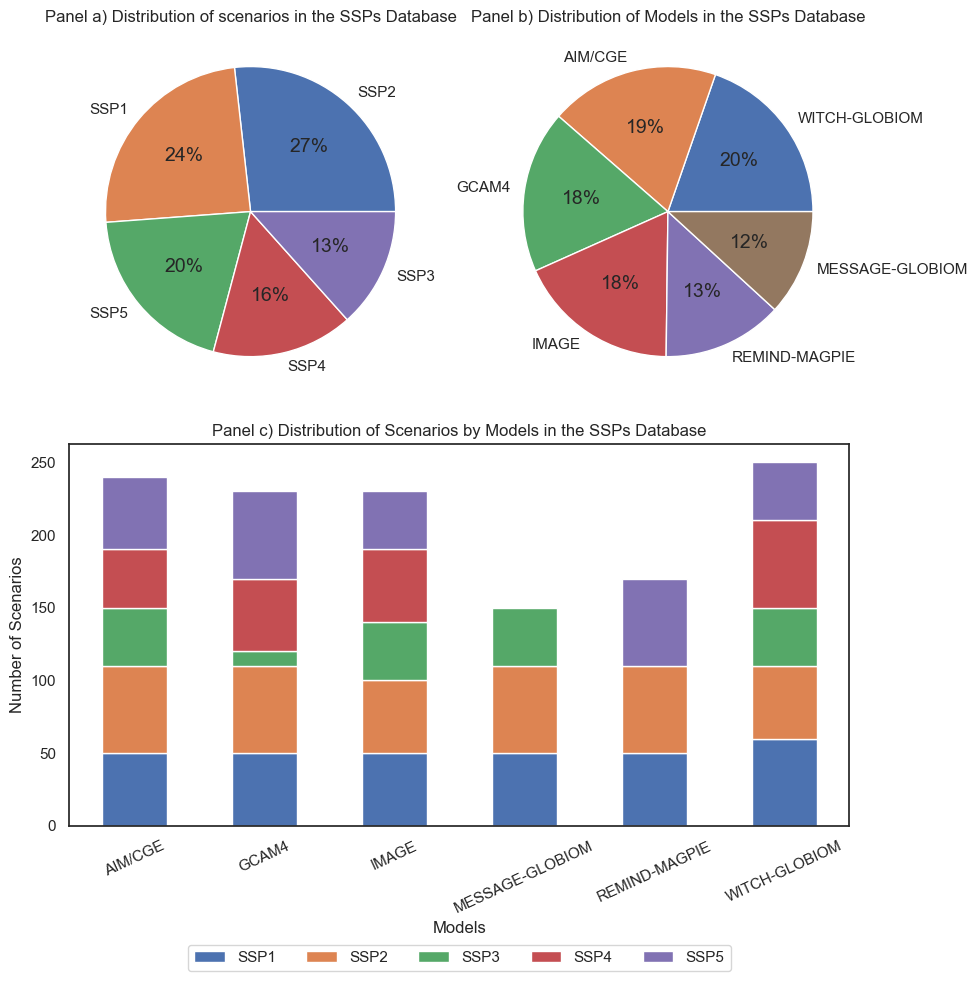

In [33]:
# ---------------
# Figure B.1, Appendix B, in the Supplementary Material of the paper
# ---------------

# --------------------------
# Set up the style parameters
# --------------------------
sns.set()
sns.set_style("white")
plt.rcParams['figure.dpi']= 100
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("savefig", dpi=150)
plt.rc("font", size=14)

# --------------------------
# Set up the figure
# --------------------------
fig = plt.figure()
gs = fig.add_gridspec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
ax1 = fig.add_subplot(gs[0, 0]) # Pie chart for scenarios
ax2 = fig.add_subplot(gs[0, 1]) # Pie chart for models
ax3 = fig.add_subplot(gs[1, :]) # Stacked bar chart for scenarios and models

# --------------------------
# Pie chart for scenarios
# --------------------------
df_ssps['scenario'].value_counts().plot.pie(autopct='%1.0f%%', ax=ax1)
ax1.set_title('Panel a) Distribution of scenarios in the SSPs Database')
# add legend bottom center horizontally
ax1.set_ylabel('')
# Set background to transparent
ax1.set_facecolor('None')
# Remove count from the y-axis
ax2.set_yticklabels([])

# --------------------------
# Pie chart for models
# --------------------------
df_ssps['model'].value_counts().plot.pie(autopct='%1.0f%%', ax=ax2)
ax2.set_title('Panel b) Distribution of Models in the SSPs Database')
# add legend bottom center horizontally
ax2.set_ylabel('')
# Set background to transparent
ax2.set_facecolor('None')

# --------------------------
# Stacked bar chart for scenarios and models
# --------------------------

df_ssps.groupby(['model', 'scenario']).size().unstack().plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Panel c) Distribution of Scenarios by Models in the SSPs Database')
# add legend bottom center horizontally
ax3.legend(loc='lower center', bbox_to_anchor=(0.5, -0.40), ncol=5)
ax3.set_ylabel('')
# Set background to transparent
ax3.set_facecolor('None')
# set x-axis labels to horizontal
ax3.tick_params(axis='x', rotation=25)
# x-axis labels
ax3.set_xlabel('Models')
# y-axis labels
ax3.set_ylabel('Number of Scenarios')

plt.tight_layout()
plt.show()

# Save the figure 
fig.savefig('fig_B1.png', bbox_inches='tight')


In [34]:
# Provide the numbers of the above chart
df_ssps.groupby(['model', 'scenario']).size().unstack()

scenario,SSP1,SSP2,SSP3,SSP4,SSP5
model,,,,,
AIM/CGE,50.0,60.0,40.0,40.0,50.0
GCAM4,50.0,60.0,10.0,50.0,60.0
IMAGE,50.0,50.0,40.0,50.0,40.0
MESSAGE-GLOBIOM,50.0,60.0,40.0,NaN,NaN
REMIND-MAGPIE,50.0,60.0,NaN,NaN,60.0
WITCH-GLOBIOM,60.0,50.0,40.0,60.0,40.0


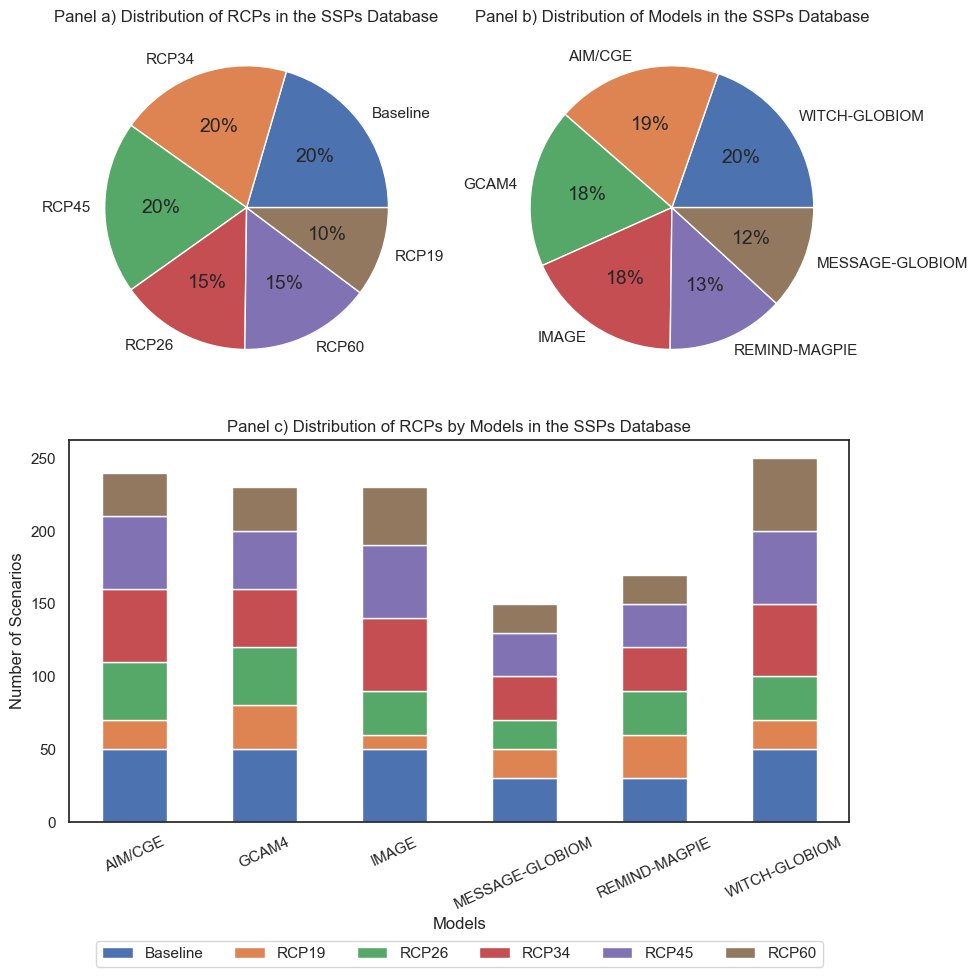

In [35]:
# ---------------
# Additional Figure, not in the paper, replicating the Figure B.1 in the Supplementary Material of the paper, but for the RCPs
# ---------------


# --------------------------
# Set up the style parameters
# --------------------------
sns.set()
sns.set_style("white")
plt.rcParams['figure.dpi']= 100
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("savefig", dpi=150)
plt.rc("font", size=14)

# --------------------------
# Set up the figure
# --------------------------
fig = plt.figure()
gs = fig.add_gridspec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
ax1 = fig.add_subplot(gs[0, 0]) # Pie chart for scenarios
ax2 = fig.add_subplot(gs[0, 1]) # Pie chart for models
ax3 = fig.add_subplot(gs[1, :]) # Stacked bar chart for scenarios and models

# --------------------------
# Pie chart for scenarios
# --------------------------
df_ssps['rcp'].value_counts().plot.pie(autopct='%1.0f%%', ax=ax1)
ax1.set_title('Panel a) Distribution of RCPs in the SSPs Database')
# add legend bottom center horizontally
ax1.set_ylabel('')
# Set background to transparent
ax1.set_facecolor('None')
# Remove count from the y-axis
ax2.set_yticklabels([])

# --------------------------
# Pie chart for models
# --------------------------
df_ssps['model'].value_counts().plot.pie(autopct='%1.0f%%', ax=ax2)
ax2.set_title('Panel b) Distribution of Models in the SSPs Database')
# add legend bottom center horizontally
ax2.set_ylabel('')
# Set background to transparent
ax2.set_facecolor('None')

# --------------------------
# Stacked bar chart for scenarios and models
# --------------------------

df_ssps.groupby(['model', 'rcp']).size().unstack().plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Panel c) Distribution of RCPs by Models in the SSPs Database')
# add legend bottom center horizontally
ax3.legend(loc='lower center', bbox_to_anchor=(0.5, -0.40), ncol=6)
ax3.set_ylabel('')
# Set background to transparent
ax3.set_facecolor('None')
# set x-axis labels to horizontal
ax3.tick_params(axis='x', rotation=25)
# x-axis labels
ax3.set_xlabel('Models')
# y-axis labels
ax3.set_ylabel('Number of Scenarios')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('z_additional_fig_rcps.png', bbox_inches='tight')


In [36]:
# Provide the numbers of the above chart
df_ssps.groupby(['model', 'rcp']).size().unstack()

rcp,Baseline,RCP19,RCP26,RCP34,RCP45,RCP60
model,,,,,,
AIM/CGE,50,20,40,50,50,30
GCAM4,50,30,40,40,40,30
IMAGE,50,10,30,50,50,40
MESSAGE-GLOBIOM,30,20,20,30,30,20
REMIND-MAGPIE,30,30,30,30,30,20
WITCH-GLOBIOM,50,20,30,50,50,50


In [37]:
df_ssps.to_csv('../05_data/df_ssps_cleaned.csv')